In [17]:
import os

import shap
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt

In [3]:
model = load_model("resnet50_2layers.h5")

In [15]:
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

def do_shap(image_path, save_path):
    image = cv2.resize(cv2.imread(image_path), (192, 192))
    masker = shap.maskers.Image("inpaint_telea", image[0].shape)
    explainer = shap.Explainer(f, masker)
    shap_values = explainer(image, max_evals=1000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])
    shap.image_plot(shap_values, show=False)
    plt.savefig(save_path)

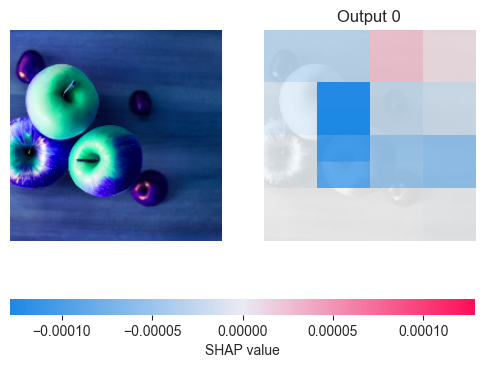

In [16]:
PATH_TO_INPUT = r"C:\Users\PC\OneDrive\Pulpit\baza danych\to_generate"
PATH_TO_OUTPUT = r"C:\Users\PC\OneDrive\Pulpit\baza danych\shap"

In [ ]:
for folder in os.listdir(PATH_TO_INPUT):
    os.makedirs(PATH_TO_OUTPUT+"\\"+folder)
    for file in os.listdir(PATH_TO_INPUT+"\\"+folder):
        do_shap(PATH_TO_INPUT+"\\"+folder+"\\"+file, PATH_TO_OUTPUT)